In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# path = '/content/drive/My Drive/ready_to_train_0 to120000 reviews.csv'
# path = '/content/drive/My Drive/ready_to_train_0 to120000 reviews with tf-idf adv and adj and intention.csv'
# path = '/content/drive/My Drive/merged_data_ready_to_train with intention without features name.csv'
path = '/content/drive/My Drive/merged_data_ready_to_train with intention without feature name.csv'

data = pd.read_csv(path)

In [4]:
data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,output
0,1,25,75.88,3.7,1.000000,0.000000,3,0,0,0,0,0,0,0,1,0.03,0.03,0.03,0.03,0.03,0.70,0.03,0.03,0.03,0.03,0,0,0,0,1,2
1,5,63,77.23,5.2,0.575000,0.500000,7,1,0,0,0,0,0,0,2,0.01,0.01,0.01,0.01,0.01,0.87,0.01,0.01,0.01,0.01,0,0,0,1,0,1
2,1,2,121.22,-3.5,0.500000,0.500000,1,0,0,0,0,0,0,0,0,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,1
3,5,4,121.22,-3.5,0.600000,0.700000,0,0,0,0,0,0,1,0,1,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,3
4,1,9,120.21,-3.1,0.900000,-0.800000,1,0,1,0,0,1,0,0,-3,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308376,2,4,121.22,-3.5,0.600000,0.700000,0,0,0,0,0,0,1,0,1,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,0
308377,1,6,36.62,8.4,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0,0,0,0,1,1
308378,3,34,73.85,4.5,0.916667,-0.033333,3,1,0,0,0,0,0,0,-1,0.03,0.03,0.03,0.03,0.03,0.28,0.03,0.03,0.03,0.52,0,0,0,0,1,0
308379,2,4,121.22,-3.5,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0,0,0,0,1,0


In [5]:
# Get names of indexes for which column Age has value 30
indexNames = data[ data['output'] == -1].index
# print(indexNames)
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,output
0,1,25,75.88,3.7,1.000000,0.000000,3,0,0,0,0,0,0,0,1,0.03,0.03,0.03,0.03,0.03,0.70,0.03,0.03,0.03,0.03,0,0,0,0,1,2
1,5,63,77.23,5.2,0.575000,0.500000,7,1,0,0,0,0,0,0,2,0.01,0.01,0.01,0.01,0.01,0.87,0.01,0.01,0.01,0.01,0,0,0,1,0,1
2,1,2,121.22,-3.5,0.500000,0.500000,1,0,0,0,0,0,0,0,0,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,1
3,5,4,121.22,-3.5,0.600000,0.700000,0,0,0,0,0,0,1,0,1,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,3
4,1,9,120.21,-3.1,0.900000,-0.800000,1,0,1,0,0,1,0,0,-3,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308376,2,4,121.22,-3.5,0.600000,0.700000,0,0,0,0,0,0,1,0,1,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,0
308377,1,6,36.62,8.4,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0,0,0,0,1,1
308378,3,34,73.85,4.5,0.916667,-0.033333,3,1,0,0,0,0,0,0,-1,0.03,0.03,0.03,0.03,0.03,0.28,0.03,0.03,0.03,0.52,0,0,0,0,1,0
308379,2,4,121.22,-3.5,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0,0,0,0,1,0


In [6]:
data.loc[(data["output"] ==0)] = 1
# data.loc[data.output==0, 'output'] = 1
data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,output
0,1,25,75.88,3.7,1.000,0.0,3,0,0,0,0,0,0,0,1,0.03,0.03,0.03,0.03,0.03,0.70,0.03,0.03,0.03,0.03,0,0,0,0,1,2
1,5,63,77.23,5.2,0.575,0.5,7,1,0,0,0,0,0,0,2,0.01,0.01,0.01,0.01,0.01,0.87,0.01,0.01,0.01,0.01,0,0,0,1,0,1
2,1,2,121.22,-3.5,0.500,0.5,1,0,0,0,0,0,0,0,0,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,1
3,5,4,121.22,-3.5,0.600,0.7,0,0,0,0,0,0,1,0,1,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,3
4,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308376,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
308377,1,6,36.62,8.4,0.000,0.0,1,0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0,0,0,0,1,1
308378,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
308379,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1


In [7]:
data.loc[(data["output"] ==2)] = 1
# data.loc[data.output==2, 'output'] = 1
data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,output
0,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
1,5,63,77.23,5.2,0.575,0.5,7,1,0,0,0,0,0,0,2,0.01,0.01,0.01,0.01,0.01,0.87,0.01,0.01,0.01,0.01,0,0,0,1,0,1
2,1,2,121.22,-3.5,0.500,0.5,1,0,0,0,0,0,0,0,0,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,1
3,5,4,121.22,-3.5,0.600,0.7,0,0,0,0,0,0,1,0,1,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,3
4,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308376,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
308377,1,6,36.62,8.4,0.000,0.0,1,0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0,0,0,0,1,1
308378,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
308379,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1


In [8]:
data.loc[(data["output"] ==3)] = 1
# data.loc[data.output==3, 'output'] = 1
data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,output
0,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
1,5,63,77.23,5.2,0.575,0.5,7,1,0,0,0,0,0,0,2,0.01,0.01,0.01,0.01,0.01,0.87,0.01,0.01,0.01,0.01,0,0,0,1,0,1
2,1,2,121.22,-3.5,0.500,0.5,1,0,0,0,0,0,0,0,0,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,1
3,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
4,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308376,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
308377,1,6,36.62,8.4,0.000,0.0,1,0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0,0,0,0,1,1
308378,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
308379,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1


In [9]:
data.loc[(data["output"] >3)] = 0
# data.loc[data.output>3, 'output'] = 0
data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,output
0,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
1,5,63,77.23,5.2,0.575,0.5,7,1,0,0,0,0,0,0,2,0.01,0.01,0.01,0.01,0.01,0.87,0.01,0.01,0.01,0.01,0,0,0,1,0,1
2,1,2,121.22,-3.5,0.500,0.5,1,0,0,0,0,0,0,0,0,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,1
3,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
4,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308376,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
308377,1,6,36.62,8.4,0.000,0.0,1,0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0,0,0,0,1,1
308378,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
308379,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1


In [10]:
data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,output
0,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
1,5,63,77.23,5.2,0.575,0.5,7,1,0,0,0,0,0,0,2,0.01,0.01,0.01,0.01,0.01,0.87,0.01,0.01,0.01,0.01,0,0,0,1,0,1
2,1,2,121.22,-3.5,0.500,0.5,1,0,0,0,0,0,0,0,0,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,0,0,1,1
3,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
4,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308376,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
308377,1,6,36.62,8.4,0.000,0.0,1,0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0,0,0,0,1,1
308378,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1
308379,1,1,1.00,1.0,1.000,1.0,1,1,1,1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1


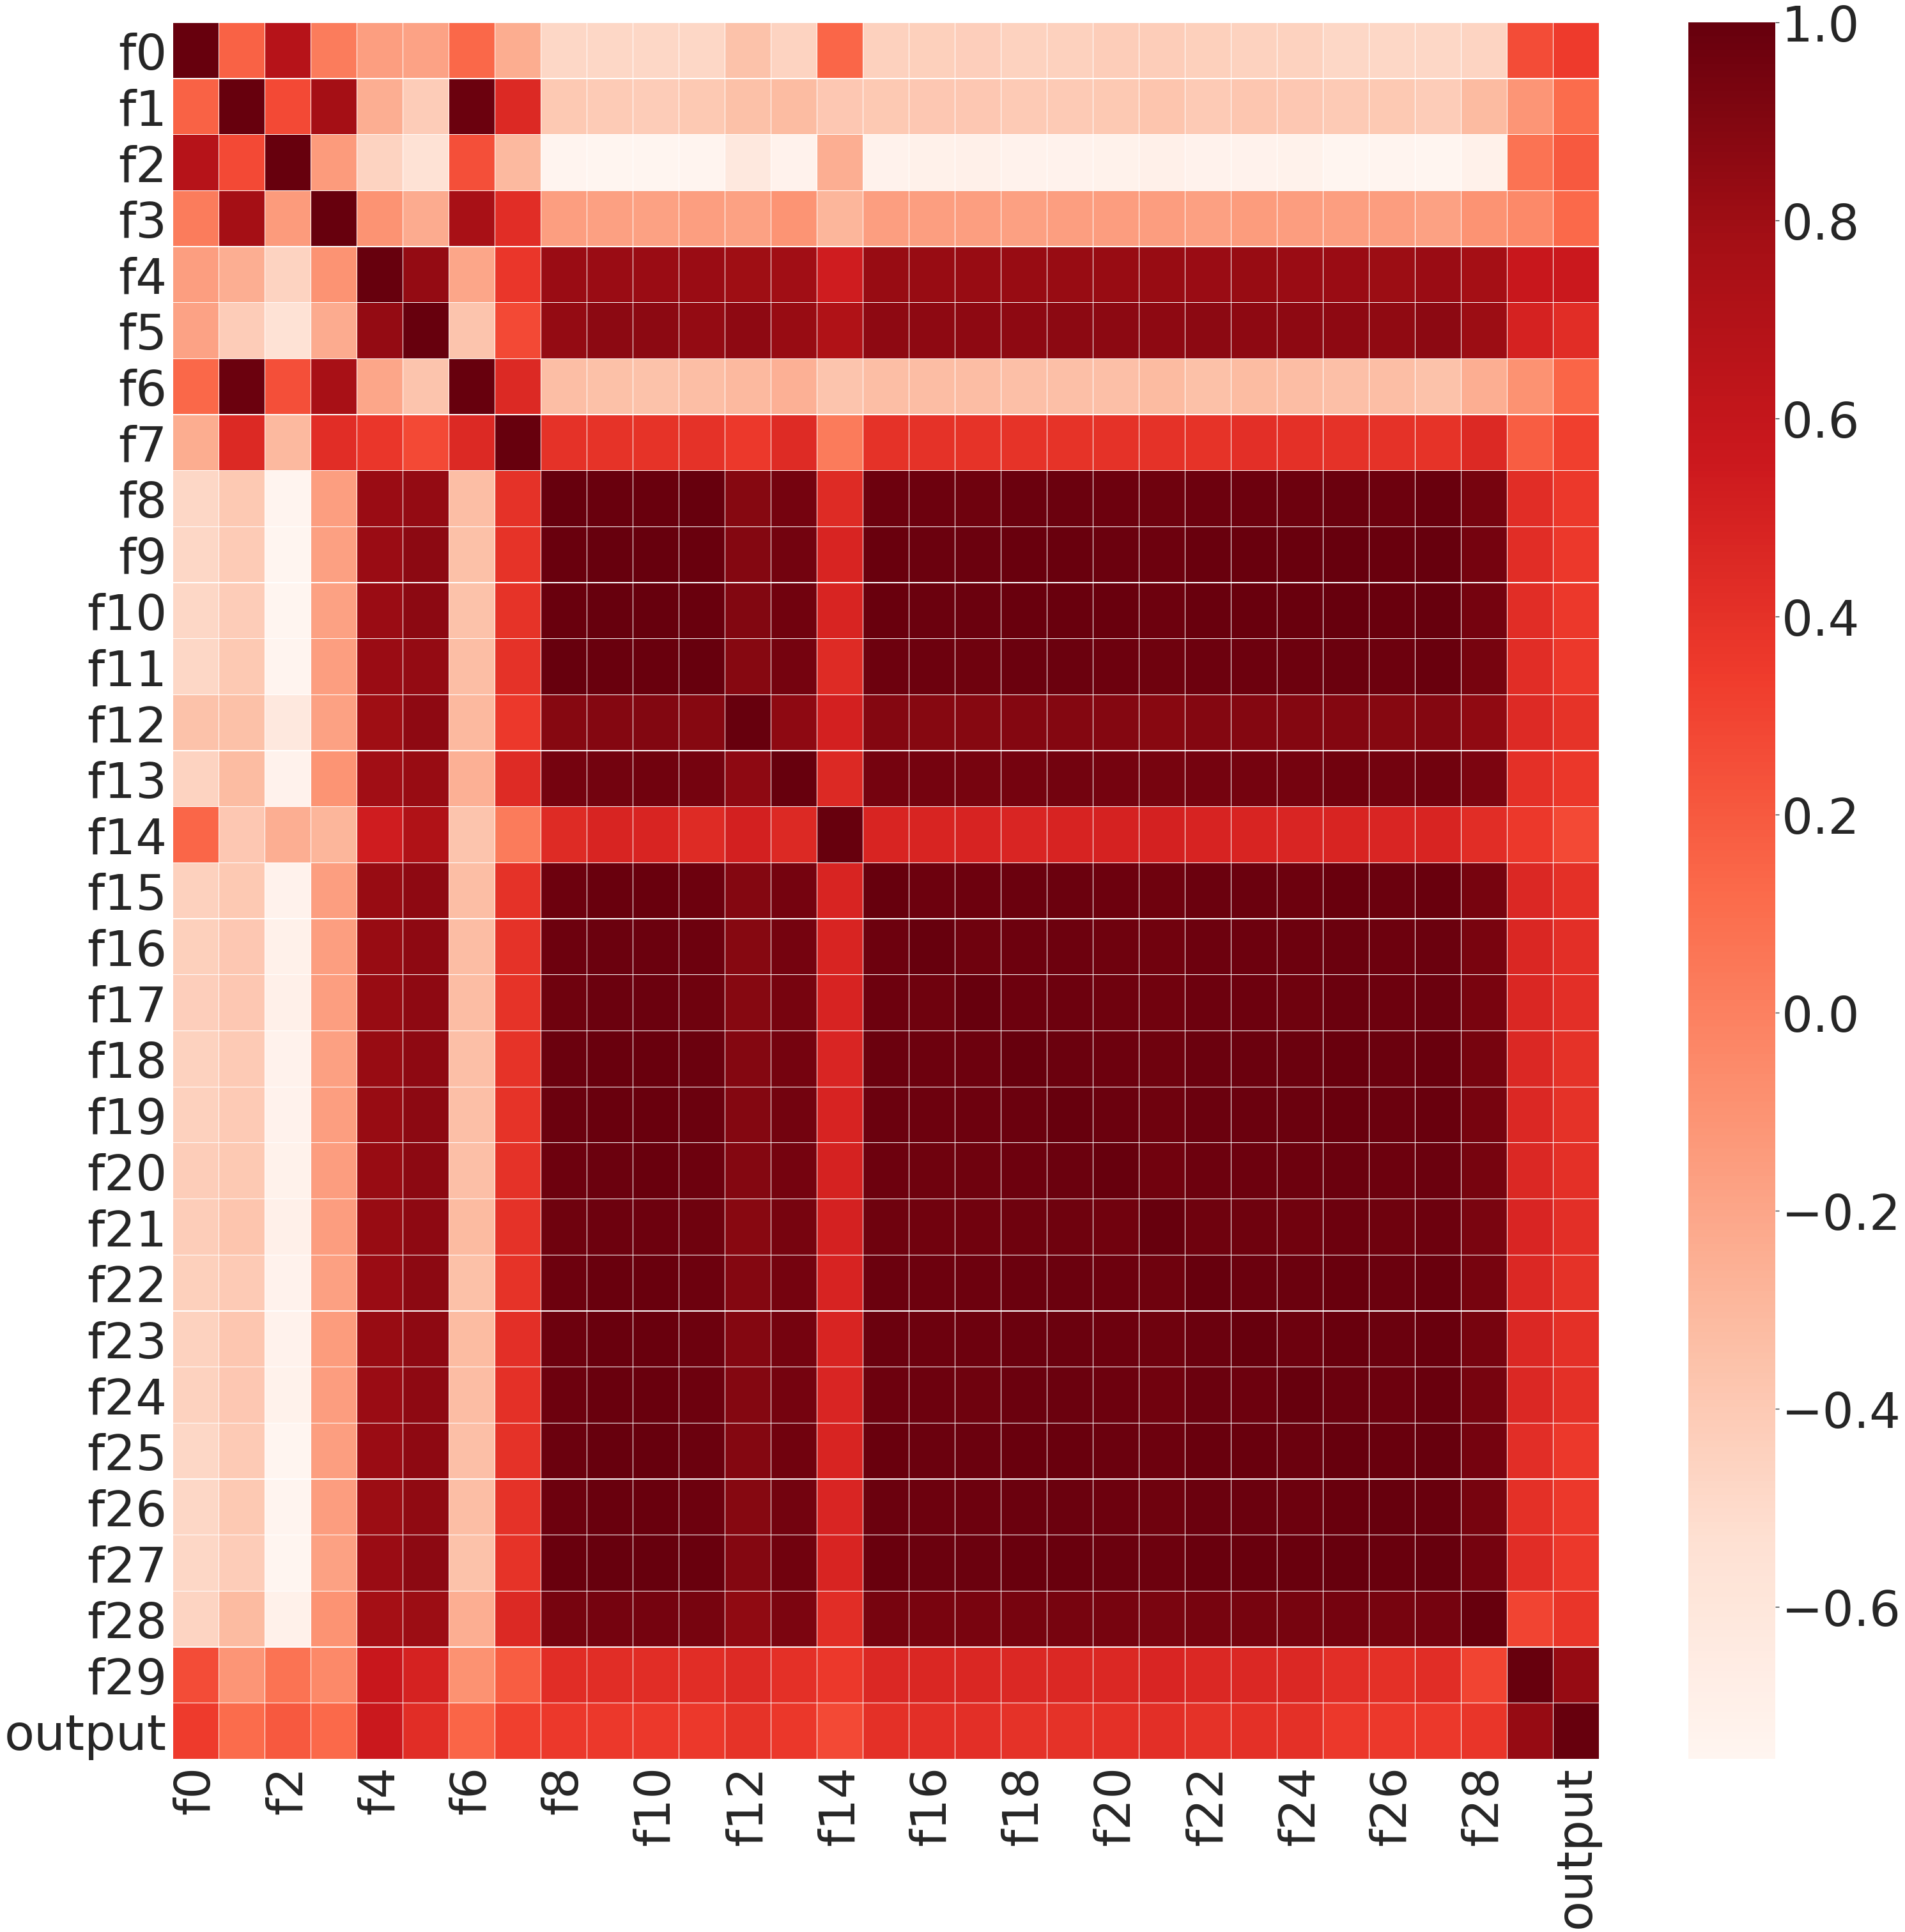

In [11]:
#Using Pearson Correlation
# plt.figure(figsize=(12,10))
sns.set(font_scale=7)
        

plt.figure(figsize=(50,50))

cor = data.corr()
# sns.heatmap(cor, annot=True,linewidths=.3)
# sns.heatmap(cor, annot=True,linewidths=.3,cmap=plt.cm.Reds)
sns.heatmap(cor,linewidths=.3,cmap=plt.cm.Reds)


path3 = '/content/drive/My Drive/thesis-part2-correlation for merged_data_ready_to_train with intention.png'

plt.savefig(path3)
plt.show()

In [12]:
#Correlation with output variable
cor_target = abs(cor["output"])#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.1]
relevant_features

Series([], Name: output, dtype: float64)

In [13]:
#Correlation with output variable
cor_target = abs(cor["f0"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f0    1.0
Name: f0, dtype: float64

In [14]:
#Correlation with output variable
cor_target = abs(cor["f1"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f1    1.000000
f6    0.986115
Name: f1, dtype: float64

In [15]:
#Correlation with output variable
cor_target = abs(cor["f2"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f2    1.0
Name: f2, dtype: float64

In [16]:
#Correlation with output variable
cor_target = abs(cor["f3"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f3    1.0
Name: f3, dtype: float64

In [17]:
#Correlation with output variable
cor_target = abs(cor["f4"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f4    1.0
Name: f4, dtype: float64

In [18]:
#Correlation with output variable
cor_target = abs(cor["f5"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f5    1.0
Name: f5, dtype: float64

In [19]:
#Correlation with output variable
cor_target = abs(cor["f6"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f1    0.986115
f6    1.000000
Name: f6, dtype: float64

In [20]:
#Correlation with output variable
cor_target = abs(cor["f7"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f7    1.0
Name: f7, dtype: float64

In [21]:
#Correlation with output variable
cor_target = abs(cor["f8"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f8     1.000000
f9     0.986681
f10    0.987706
f11    0.998127
f13    0.948695
f15    0.978014
f16    0.973747
f17    0.970434
f18    0.983898
f19    0.979789
f20    0.974390
f21    0.966340
f22    0.978349
f23    0.978024
f24    0.976113
f25    0.984835
f26    0.978559
f27    0.987178
f28    0.940739
Name: f8, dtype: float64

In [22]:
#Correlation with output variable
cor_target = abs(cor["f9"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f8     0.986681
f9     1.000000
f10    0.998643
f11    0.987419
f13    0.958578
f15    0.988848
f16    0.983491
f17    0.981460
f18    0.990418
f19    0.990951
f20    0.985496
f21    0.977224
f22    0.989486
f23    0.988925
f24    0.986382
f25    0.995423
f26    0.989240
f27    0.998079
f28    0.949181
Name: f9, dtype: float64

In [23]:
#Correlation with output variable
cor_target = abs(cor["f10"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f8     0.987706
f9     0.998643
f10    1.000000
f11    0.988457
f13    0.959386
f15    0.989904
f16    0.984541
f17    0.982433
f18    0.991469
f19    0.992032
f20    0.986570
f21    0.978271
f22    0.990582
f23    0.989959
f24    0.987424
f25    0.996524
f26    0.990292
f27    0.999192
f28    0.949868
Name: f10, dtype: float64

In [24]:
#Correlation with output variable
cor_target = abs(cor["f11"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f8     0.998127
f9     0.987419
f10    0.988457
f11    1.000000
f13    0.949403
f15    0.978755
f16    0.973906
f17    0.971150
f18    0.984699
f19    0.980559
f20    0.975165
f21    0.967163
f22    0.979129
f23    0.978805
f24    0.976900
f25    0.985603
f26    0.979333
f27    0.987916
f28    0.941429
Name: f11, dtype: float64

In [25]:
#Correlation with output variable
cor_target = abs(cor["f12"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f12    1.0
Name: f12, dtype: float64

In [26]:
#Correlation with output variable
cor_target = abs(cor["f13"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f8     0.948695
f9     0.958578
f10    0.959386
f11    0.949403
f13    1.000000
f15    0.950245
f16    0.946512
f17    0.944750
f18    0.951778
f19    0.952681
f20    0.948034
f21    0.940306
f22    0.950434
f23    0.952038
f24    0.949624
f25    0.959426
f26    0.952153
f27    0.959367
f28    0.922656
Name: f13, dtype: float64

In [27]:
#Correlation with output variable
cor_target = abs(cor["f14"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f14    1.0
Name: f14, dtype: float64

In [28]:
#Correlation with output variable
cor_target = abs(cor["f29"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.9]
relevant_features

f29    1.0
Name: f29, dtype: float64

In [29]:
# print(data[["review_length","review_nouns_count"]].corr())
# print(data[["review_length","review_verbs_count"]].corr())
# print(data[["review_polarity","review_sentiment"]].corr())

In [30]:
# from google.colab import drive
# drive.mount('/content/drive')
